In [1]:
#hide
#skip
! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab
!gdown --id 1MbUWPsEZJ_Dana5RC07wUGTIgzN92Uld

     |████████████████████████████████| 189 kB 10.8 MB/s 
     |████████████████████████████████| 56 kB 5.0 MB/s 
Downloading...
From: https://drive.google.com/uc?id=1MbUWPsEZJ_Dana5RC07wUGTIgzN92Uld
To: /content/seeds.csv
100% 9.12k/9.12k [00:00<00:00, 16.8MB/s]


In [2]:
#hide
from fastai.tabular.all import *

In [3]:
#hide
filename = "seeds.csv"
path = Path("/content/")

#Cover Page
### Developed by:
*   Mohamed Salah Eldin - 41810303
*   Fatma Mohamed - 41810121



# Problem Definition
**This data was acquired from the 'UCI Center for Machine Learning' repository. It contains seven variables for three distinct types of wheat kernels: (Kama, Rosa, Canadian) designated as numerical variables 1, 2 & 3 respectively The last column is reserved for the Kernel type.**

In [4]:
df = pd.read_csv(filename)
df.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


# Method
In order to accomplish accurate classification easily and quickly, we've opted for the FastAI library as it has excellent support for tabular data and makes cutting edge mdoels and techniques readily available.

We use 20% of the dataset for validation, and the seed has been set to 123 to ensure that the dataset is split in the same way each time the code is run, to ensure repeatability.

We've set it to normalize any continuous data (All fields), fill any missing fields and to categorify our variables (Type).

We've identified which columns are discrete and which are continuous too.

In [5]:
seed = 123
use_seed = True;

In [6]:
splits = RandomSplitter(valid_pct=0.4, seed=seed)(range_of(df))
procs=[Categorify, FillMissing, Normalize]

cat_names=["Type"]
cont_names = ['Area','Perimeter','Compactness','Kernel.Length',
           'Kernel.Width','Asymmetry.Coeff','Kernel.Groove']

cont,cat = cont_cat_split(df, 1, dep_var='Type')

to = TabularPandas(df, procs=procs, cont_names=cont, cat_names=cat,
                   y_names='Type', splits=splits)

In [7]:
if use_seed: set_seed(seed, True)

The batch size is set to 22. After experimentation we found that this batch size provided good accuracy after 10 epochs or so.

Decreasing the batch size leads to faster training and overfitting, but also gives over all lower accuracy.

In [8]:
dls = to.dataloaders(bs=22)
if use_seed: dls.rng.seed(seed, True)

In [9]:
dls.show_batch()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,18.719999,16.340000,0.8810,6.219,3.684,2.188,6.097,2.0
1,14.330000,14.280000,0.8831,5.504,3.199,3.328,5.224,1.0
2,13.220000,13.840000,0.8680,5.395,3.070,4.157,5.088,1.0
3,12.540000,13.670000,0.8425,5.451,2.879,3.082,5.491,3.0
4,17.360001,15.760000,0.8785,6.145,3.574,3.526,5.971,2.0
5,17.320000,15.910000,0.8599,6.064,3.403,3.824,5.922,2.0
6,10.790000,12.930000,0.8107,5.317,2.648,5.462,5.194,3.0
7,18.980000,16.660000,0.8590,6.549,3.670,3.691,6.498,2.0
8,20.200001,16.889999,0.8894,6.285,3.864,5.173,6.187,2.0
9,12.730000,13.750000,0.8458,5.412,2.882,3.533,5.067,1.0


# Experiment
A FastAI tabular learner object is instantiated. By default tabular learners have 2 hidden layers with 200 and 100 activations respectively, this was changed to 1000 and 00 activations respectively as that gave on average 1-2% better accuracy. Adding more hidden layers did not seem to provide any significant advantages.

In [10]:
learn = tabular_learner(dls, metrics=accuracy_multi, layers=[1000,50])

lr_find does mock training over a large range of learning rates and graphs the loss for us. As per the recommendations in the fastai documentation for 1cycle, we pick a maximum learning rate that is an order of magnitude below the minima.

SuggestedLRs(valley=0.00363078061491251)

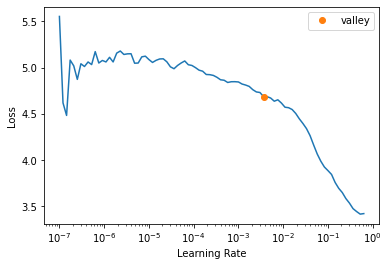

In [11]:
learn.lr_find()

We're using the 1cycle technique to fit our model here, this is a relatively new technique that allows you to get convergence with less epochs. It works by varying the learning rate throughout the duration of the training.

In [12]:
learn.fit_one_cycle(20, lr_max=1e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,4.652903,4.078217,0.481013,00:00
1,4.520117,3.825117,0.405063,00:00
2,4.426299,3.703963,0.594937,00:00
3,4.243644,3.715992,0.594937,00:00
4,3.953643,2.540791,0.683544,00:00
5,3.504402,1.503127,0.759494,00:00
6,2.977572,0.363583,1.000000,00:00
7,2.505000,0.305809,1.000000,00:00
8,2.157396,0.231095,1.000000,00:00
9,1.873327,0.305382,1.000000,00:00


We can see that overfitting starts happening after epoch 10~, though it is not significant.

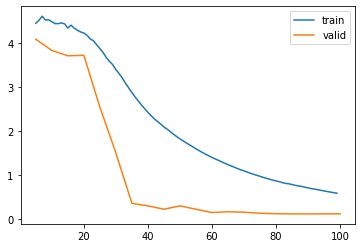

In [13]:
learn.recorder.plot_loss()

Below is a table that shows the predictions the trained model made on a few rows from the training dataset.

In [14]:
learn.show_results()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type,Type_pred
0,0.275778,0.435411,-0.457414,0.471699,0.106976,-0.793124,0.696438,2.0,1.569622
1,-0.248292,-0.276841,0.410093,-0.420867,-0.107396,-1.473446,-0.838529,1.0,0.911283
2,0.462708,0.600354,-0.200373,0.501149,0.381875,0.246932,0.784326,2.0,1.991730
3,-0.094743,0.060542,-0.626095,0.206648,-0.329333,0.145694,-0.031189,1.0,1.232438
4,1.537552,1.642490,0.088793,1.538701,1.380593,-0.149923,1.131789,2.0,2.000960
5,-0.839123,-0.696694,-1.449424,-0.488829,-1.035497,0.577644,-0.104769,3.0,2.740427
6,-0.762349,-0.801657,-0.144146,-0.808249,-0.697547,0.351545,-0.836485,3.0,2.263345
7,0.305820,0.165505,1.462346,-0.219247,0.681995,-1.553087,-0.746553,1.0,1.210663
8,0.486074,0.487893,0.626969,0.562316,0.576070,-0.088505,1.043901,2.0,2.085140


Below some example code is provided that does inference on one row. Feel free to modify it.

In [15]:
df.iloc[50]


Area               14.4900
Perimeter          14.6100
Compactness         0.8538
Kernel.Length       5.7150
Kernel.Width        3.1130
Asymmetry.Coeff     4.1160
Kernel.Groove       5.3960
Type                1.0000
Name: 50, dtype: float64

In [16]:
df.iloc[50] = [15.26,14.84,0.871,5.763,3.312,2.221,5.22,3]


In [17]:
row, clas, probs = learn.predict(df.iloc[50])

In [18]:
row.show()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.871,5.763,3.312,2.221,5.22,0.857998


In [19]:
clas, probs

(tensor([0.8580]), tensor([0.8580]))